In [6]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             HistGradientBoostingClassifier, AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [8]:
# load dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# print all column
pd.set_option('display.max_columns', None)
# print first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
# drop missing values
df.dropna(inplace=True)

# drop customerID
df.drop('customerID', axis=1, inplace=True)

In [12]:
# summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [13]:
# apply loop check unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
# check missing value
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
from sklearn.preprocessing import OneHotEncoder

# For newer scikit-learn (>=1.2):
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

if len(categorical_cols) > 0:
    # Apply OneHotEncoder (updated for newer scikit-learn)
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = encoder.fit_transform(df[categorical_cols])

    # Create encoded DataFrame
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original columns and concat
    df = df.drop(columns=categorical_cols)
    df = pd.concat([df, encoded_df], axis=1)
else:
    print("No categorical columns were found to encode.")

In [19]:
# Step 1: Properly identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 2: Check if they exist in DataFrame
available_cols = [col for col in categorical_cols if col in df.columns]

if not available_cols:
    print("No categorical columns to encode!")
    encoded_df = pd.DataFrame()  # Empty DataFrame
else:
    print(f"Encoding categorical columns: {available_cols}")
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_data = encoder.fit_transform(df[available_cols])
    encoded_df = pd.DataFrame(
        encoded_data,
        columns=encoder.get_feature_names_out(available_cols)
    )

No categorical columns to encode!


In [20]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [21]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [23]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [24]:
def clean_data(X, y):
    """Remove rows with NaN values in either features or target"""
    # Combine to find rows with any NaN
    combined = pd.concat([X, y], axis=1)
    clean_idx = combined.dropna().index

    return X.loc[clean_idx], y.loc[clean_idx]

# Clean both training and test sets
X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)
X,y=clean_data(X, y)

# Verify no NaN values remain
print("Remaining NaN in X_train:", X_train.isna().sum().sum())
print("Remaining NaN in y_train:", y_train.isna().sum())
print("Remaining NaN in X_test:", X_test.isna().sum().sum())
print("Remaining NaN in y_test:", y_test.isna().sum())
print(y.isna().sum(),X.isna().sum())

Remaining NaN in X_train: 0
Remaining NaN in y_train: 0
Remaining NaN in X_test: 0
Remaining NaN in y_test: 0
0 SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet serv

In [25]:


def get_model_configurations():
    """Returns models with appropriate NaN handling and preprocessing"""
    models = [
        # Models that can handle NaN in features natively
        ('HistGradientBoosting', HistGradientBoostingClassifier(random_state=42),
            {'histgradientboostingclassifier__max_iter': [100, 200],
             'histgradientboostingclassifier__learning_rate': [0.05, 0.1]}),

        # Models with imputation
        ('Random Forest', make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42)),
            {'randomforestclassifier__n_estimators': [50, 100],
             'randomforestclassifier__max_depth': [None, 10]}),

        ('Gradient Boosting', make_pipeline(SimpleImputer(), GradientBoostingClassifier(random_state=42)),
            {'gradientboostingclassifier__n_estimators': [50, 100],
             'gradientboostingclassifier__learning_rate': [0.05, 0.1]}),

        ('SVM', make_pipeline(SimpleImputer(), StandardScaler(), SVC(random_state=42, class_weight='balanced')),
            {'svc__C': [0.1, 1, 10],
             'svc__gamma': ['scale', 'auto']}),

        ('Logistic Regression', make_pipeline(SimpleImputer(), StandardScaler(),
                                           LogisticRegression(random_state=42, class_weight='balanced')),
            {'logisticregression__C': [0.1, 1, 10],
             'logisticregression__penalty': ['l2']}),

        ('K-Nearest Neighbors', make_pipeline(SimpleImputer(), StandardScaler(), KNeighborsClassifier()),
            {'kneighborsclassifier__n_neighbors': [3, 5, 7],
             'kneighborsclassifier__weights': ['uniform', 'distance']}),

        ('Decision Tree', make_pipeline(SimpleImputer(), DecisionTreeClassifier(random_state=42)),
            {'decisiontreeclassifier__max_depth': [None, 10, 20],
             'decisiontreeclassifier__min_samples_split': [2, 5, 10]}),

        ('AdaBoost', make_pipeline(SimpleImputer(), AdaBoostClassifier(random_state=42)),
            {'adaboostclassifier__n_estimators': [50, 100],
             'adaboostclassifier__learning_rate': [0.05, 0.1]}),

        ('XGBoost', make_pipeline(SimpleImputer(), XGBClassifier(random_state=42)),
            {'xgbclassifier__n_estimators': [50, 100],
             'xgbclassifier__learning_rate': [0.05, 0.1]}),

        ('Naive Bayes', make_pipeline(SimpleImputer(), GaussianNB()),
            {})
    ]
    return models

In [26]:
def evaluate_model(name, model, param_grid, X_train, y_train, X_test, y_test):
    """Evaluates a single model and returns its performance metrics"""
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    # Hyperparameter tuning
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    return {
        'Model': name,
        'Accuracy': accuracy,
        'Pipeline': pipeline
    }

In [27]:
def evaluate_all_models(X_train, y_train, X_test, y_test):
    """Evaluates all models with comprehensive error handling"""
    model_scores = []
    best_model = None
    best_accuracy = 0.0

    models = get_model_configurations()

    for name, pipeline, param_grid in models:
        try:
            print(f"\nEvaluating {name}...")

            # Hyperparameter tuning
            if param_grid:
                grid_search = GridSearchCV(pipeline, param_grid, cv=2, error_score='raise')
                grid_search.fit(X_train, y_train)
                pipeline = grid_search.best_estimator_

            # Fit and predict
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            model_scores.append({'Model': name, 'Accuracy': accuracy, 'Pipeline': pipeline})

            print(f"{name} Test Accuracy: {accuracy:.3f}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = pipeline

        except Exception as e:
            print(f"Failed to evaluate {name}: {str(e)}")
            continue

    if not model_scores:
        raise ValueError("All models failed to evaluate. Check your data and model configurations.")

    scores_df = pd.DataFrame(model_scores).sort_values('Accuracy', ascending=False)

    print("\n=== Evaluation Summary ===")
    print(scores_df[['Model', 'Accuracy']])
    print(f"\nBest Model: {scores_df.iloc[0]['Model']} with accuracy {scores_df.iloc[0]['Accuracy']:.3f}")

    return scores_df, best_model

In [28]:
# First ensure data is clean
X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Then run evaluation
scores_df, best_model = evaluate_all_models(X_train, y_train, X_test, y_test)


Evaluating HistGradientBoosting...
Failed to evaluate HistGradientBoosting: Invalid parameter 'histgradientboostingclassifier' for estimator HistGradientBoostingClassifier(random_state=42). Valid parameters are: ['categorical_features', 'class_weight', 'early_stopping', 'interaction_cst', 'l2_regularization', 'learning_rate', 'loss', 'max_bins', 'max_depth', 'max_features', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf', 'monotonic_cst', 'n_iter_no_change', 'random_state', 'scoring', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

Evaluating Random Forest...
Random Forest Test Accuracy: 0.775

Evaluating Gradient Boosting...
Gradient Boosting Test Accuracy: 0.784

Evaluating SVM...
SVM Test Accuracy: 0.734

Evaluating Logistic Regression...
Logistic Regression Test Accuracy: 0.746

Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.754

Evaluating Decision Tree...
Decision Tree Test Accuracy: 0.772

Evaluating AdaBoost...
AdaBoost Test Accuracy: 0.724

E

In [37]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6),
         'learning_rate': uniform(0.01, 0.2),
         'n_estimators': randint(100, 300),
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

       # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy: {:.3f}%".format(accuracy * 100))
    print()
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print(f"Model Pipeline: {best_model}")
print(f"Accuracy: {best_accuracy:.2%}")  # Proper percentage formatting

Model: Random Forest
Test Accuracy: 89.212%

Model: Gradient Boosting
Test Accuracy: 89.576%

Model: Support Vector Machine
Test Accuracy: 96.485%

Model: Logistic Regression
Test Accuracy: 78.061%

Model: K-Nearest Neighbors
Test Accuracy: 94.061%

Model: Decision Tree
Test Accuracy: 85.455%

Model: Ada Boost
Test Accuracy: 88.727%

Model: XG Boost
Test Accuracy: 89.333%

Model: Naive Bayes
Test Accuracy: 78.303%

Best Model:
Test Accuracy: 0.9648484848484848
Model Pipeline: SVC(C=1, class_weight='balanced', gamma='auto', random_state=42)
Accuracy: 96.48%



Confusion Matrix:
[[308  12]
 [ 17 488]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       320
         1.0       0.98      0.97      0.97       505

    accuracy                           0.96       825
   macro avg       0.96      0.96      0.96       825
weighted avg       0.97      0.96      0.96       825



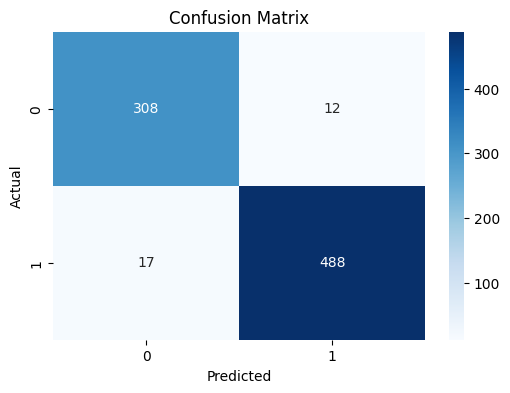

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the best model
y_best_pred = best_model.predict(Xr_test)

# Confusion Matrix
cm = confusion_matrix(yr_test, y_best_pred)
print("\nConfusion Matrix:")
print(cm)

# Optional: Classification Report
print("\nClassification Report:")
print(classification_report(yr_test, y_best_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
